# Test 1: Optimization of a Radiator

We consider two phases of conductor materials with $\eta$ small over a domain $(0,1)\times(0,1)$. Let $\chi(x)$ a characteristic (or indicator) function, and $A(x)$ the conductivity tensor for two phases, namely $0$ and $1$, each one charactirized by a diffusion tensor $A_0$ and $A_1$, respectively.

For Small-Amplitude Homogenization we have $A_1 = (1+\eta ) A_0$ and $A_n(x)=(1-\chi_n(x))A_0+\chi_n(x)A_1 = (1+\eta\chi_n(x))A_0$. Now, for a fixed $x\in\Omega$, if $\eta > 0$ we get that material 1 is the best conductor and $\theta(x) = 0  \, \Rightarrow \, A(x) = A_0$. Conversely, $\theta = 1 \, \Rightarrow \,  A = A_1$, and $|A_1| > |A_0|$. When $\eta=0.9 \Rightarrow \, A_1 = 1.9 A_0$.
On the other hand, if $\eta < 0$:  material 1 is the worst conductor. Therefore, $\theta = 0  \, \Rightarrow \,  A = A_0$, and $\theta=1 \, \Rightarrow \, A=A_1$, but $|A_1| < |A_0|$. Indeed, $A_0=1/(1+\eta)A_1$ ($\eta=-0.9$ implies $A_0 = 10A_1$ or $A_1 = 0.1 A_0$.)

In SAH we play with the relaxation $\chi \rightarrow (\theta,\xi)$, where $0\leq \theta \leq 1$ is the local proportion of material $1$ and $\xi$ is a unitary vector pointing to the local direction of lamination.

### Initialization 

Fist, we define the mesh. We are using [Gridap.jl](https://github.com/gridap/Gridap.jl) version 0.16.3 to solve the partial differential equations.

In [1]:
using Gridap

# First version: no modules yet
include("../sah/sah_diffusion.jl")

get_∇J (generic function with 1 method)

We set the geometry

In [4]:
# Generate the domain
n=100 #60 .. #! 100 ok but 110 stop at iter=3!!!! why?
domain = (0,1,0,1)
partition = (n,n)
geomodel = CartesianDiscreteModel(domain,partition)

labels = get_face_labeling(geomodel)
add_tag_from_tags!(labels,"dir1",[3,4,6]) # top
add_tag_from_tags!(labels,"dir0",[1,2,5,7,8]) # sides and bottom

# Triangulation from geometrical model
Ω = Triangulation(geomodel)
degree = 2
dΩ = Measure(Ω,degree);

and physical parameters

In [5]:
# Physical parameters
K₀ = 1000*TensorValue(1.0,0.0,0.0,1.0)

vol = 0.5  # volume fraction of material 1 (better conductor if η>0, worst otherwise)
eta = -0.5 #0.1 # contrast factor (between -1 and 1)
theta = vol*ones(num_cells(Ω)); # rand(num_cells(Ω))

We are going to constraint the volume of material 1 to the value given by `vol`, so we need to track that quantity:

In [7]:
area = sum(∫(theta)dΩ)
println("Area(θ)=",area,"  area_equi=",sum(theta)/n^2) # coincide if dx=dy

Area(θ)=0.4999999999999531  area_equi=0.5


### Setting boundary conditions

In [8]:
# test 1
f(x) = 1.0 
g(x) = 0.0 # not used in this example

g (generic function with 1 method)

### Declaration of objective functions

We call `Jf(u,f)` for volumetric objective function and `Jg(u,f)` for surface objective function.

In [9]:
# Compliance
j1(u,f)= f⋅u  # compliance *maximization* with '-'
dj1(u,f)= f
ddj1(u,f)=0.0
j2(u,f)=0.0  # not used here
dj2(u,f)=0.0
ddj2(u,f)=0.0

# This is autoadjoint: Saves computational time, do not change the solution.
autoadj = true

# To play with microstructural term: to include it or not
micro_ = false

false

In [10]:
Jf = [j1,dj1,ddj1]
Jg = [j2,dj2,ddj2]

3-element Vector{Function}:
 j2 (generic function with 1 method)
 dj2 (generic function with 1 method)
 ddj2 (generic function with 1 method)

### Perform the optimization steps


In [11]:
theta_opt, J, iter = solve_sah_diffusion(geomodel,(["dir1","dir0"],""),eta,K₀,theta,vol,f,g,x->0.0,
    Jf,Jg;degree=degree,save_VTK=true,is_autoadjoint=autoadj,max_iter=100,
    output_path="out",use_microstructure=micro_,verbose=true);

 --- SAH Diffusion problem ---
 * Mesh setting
 * Initial step
  Note: Using 'is_autoadjoint = true'
 - Warning: No microstructure here
 solution saved in out\SAHdiff_0000.vtu ...done.

===== iter 1/100  =====
 > vol.fit: num.iter=0/200 | err.rel=0.97985 | Λ=-0.35300 | Λ(min,max)=(0.01000,-0.35300)
 volume = 0.5008 || Obj.Func: old=1.000000e+10, new=2.985041e-05
 solution saved in out\SAHdiff_0001.vtu ...done.
 Gradient Descent: |dJ|_2 = 0.001908254328668311

===== iter 2/100  =====
 > vol.fit: num.iter=200/200 | err.rel=0.03383 | Λ=-0.26851 | Λ(min,max)=(-0.26851,-0.26851)
 volume = 0.5011 || Obj.Func: old=2.985041e-05, new=2.983916e-05
 solution saved in out\SAHdiff_0002.vtu ...done.
 Gradient Descent: |dJ|_2 = 0.0019132566931020834

===== iter 3/100  =====
 > vol.fit: num.iter=0/200 | err.rel=0.16331 | Λ=-0.36000 | Λ(min,max)=(0.01000,-0.36000)
 volume = 0.5006 || Obj.Func: old=2.983916e-05, new=2.970568e-05
 solution saved in out\SAHdiff_0003.vtu ...done.
 Gradient Descent: |dJ|_2 

 solution saved in out\SAHdiff_0029.vtu ...done.
 Gradient Descent: |dJ|_2 = 0.0019713533610804025

===== iter 30/100  =====
 > vol.fit: num.iter=0/200 | err.rel=0.02319 | Λ=-0.99000 | Λ(min,max)=(0.01000,-0.99000)
 volume = 0.4996 || Obj.Func: old=2.923694e-05, new=2.924055e-05
 iteration 30 not accepted: step size reduced to 154.35508482680956

===== iter 31/100  =====
 > vol.fit: num.iter=0/200 | err.rel=0.00000 | Λ=-0.99000 | Λ(min,max)=(0.01000,-0.99000)
 volume = 0.4996 || Obj.Func: old=2.923694e-05, new=2.924055e-05
 iteration 31 not accepted: step size reduced to 115.76631362010717
# STOP: No convergence found after 31 iterations: α=115.76631362010717<α_min=1.0e-5 rel.error=0.0


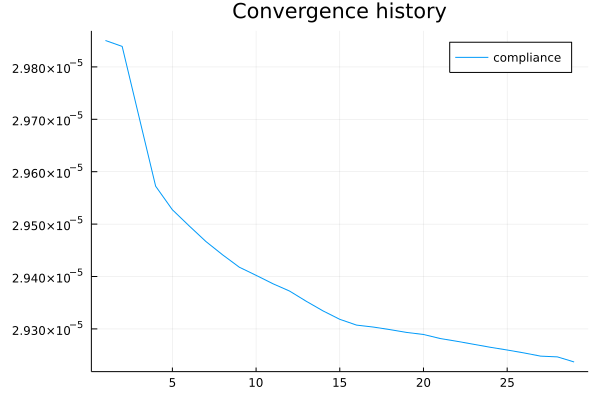

In [17]:
using Plots
gr()
plot(iter,J,label="compliance")
plot!(title="Convergence history")